In this section, the various types of clustering methods are experimented with. The simplest type, `KMeans` clustering is used, which works fine for data that can be linearly separated. For data that can't be linearly separated, non-linear clustering algorithm, like density based spatial clustering of applications with noise `(DBSCAN)` will be used.

In [1]:
# first, import necessary packages
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
# generate data with 300 samples, 5 features and group them in 3 clusters
# the features and labels are returned. labels will contain the cluster reach feature will fall in
features, labels = make_blobs(n_samples=300, n_features=5, centers=3, cluster_std=1.5, random_state=42)
print(features[:5], labels[:5])

[[ -3.61381588   9.88354273   3.81895908   0.13108866  -3.31841458]
 [ -3.44441372   6.75205619   6.2893493    1.7065715   -7.49520215]
 [ -3.64725029  -7.82994183   6.38924116   1.39508568   2.22878049]
 [-11.22269976  11.84488582   5.49141033  -5.30827531  -4.8557868 ]
 [ -2.94712663   5.03152206   5.15815575   1.37989501  -7.31333248]] [0 0 1 2 0]


In [4]:
# scale the data, as the clustering algorithms works better with numbers expressed within the same range.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
# initialize the KMeans clustering algorithm, and fit the scaled features
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(scaled_features)
preds = kmeans.predict(scaled_features)

c:\Users\dhira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [8]:
print(features[:3], labels[:3])
print("***Predicted***")
print(scaled_features[:3], preds[:3])

[[-3.61381588  9.88354273  3.81895908  0.13108866 -3.31841458]
 [-3.44441372  6.75205619  6.2893493   1.7065715  -7.49520215]
 [-3.64725029 -7.82994183  6.38924116  1.39508568  2.22878049]] [0 0 1]
***Predicted***
[[ 0.82058443  0.76454738 -1.34328325  0.17412327 -0.05984326]
 [ 0.87228055  0.40517018  0.03657786  0.56876534 -0.85849988]
 [ 0.81038131 -1.26829628  0.09237346  0.49074138  1.00085326]] [2 2 1]


In [9]:
# get the centers of each clusters
centers = kmeans.cluster_centers_ #centroids
print(centers.shape)
print(centers)

(3, 5)
[[-1.00957269  0.7156739   0.25522429 -1.30604536 -0.65080984]
 [-0.1363765  -1.39247302  0.55247195  0.63380244  1.35825838]
 [ 1.14594919  0.67679912 -0.80769624  0.67224292 -0.70744855]]


In [31]:
c = centers[0]
print(c[2:4])


[ 0.25522429 -1.30604536]


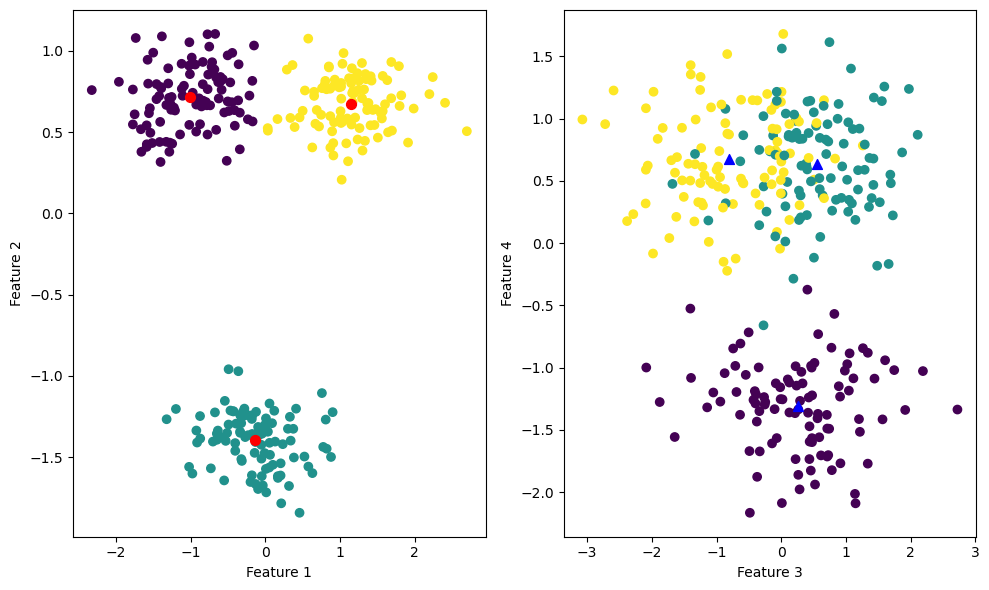

In [24]:
# plot the data [use first two features] and centroid

# plt.scatter(scaled_features[:,0], scaled_features[:,1], c = preds)
# for center in centers:
#     plt.scatter(center[:2][0], center[:2][1], marker='o',c='red',s=50)

# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.show()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax.scatter(scaled_features[:,0], scaled_features[:,1], c = preds)
ax1.scatter(scaled_features[:,2], scaled_features[:,3], c=preds) # select the feature number 3 and 4
for center in centers:
    ax.scatter(center[:2][0], center[:2][1], marker='o',c='red',s=50)
    ax1.scatter(center[2:4][0],center[2:4][1], c = 'blue', marker= '^', s = 50 ) # center co-ordinates for features 3 and 4

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

ax1.set_xlabel("Feature 3")
ax1.set_ylabel("Feature 4")

plt.tight_layout()
plt.show()

In [32]:
lbls_pred = np.unique(preds)
for l in lbls_pred:
    print(f"Number of items in cluster{l}: {np.where(kmeans.labels_==l)[0].shape[0]}")

Number of items in cluster0: 100
Number of items in cluster1: 100
Number of items in cluster2: 100


In [33]:
# next, try using KMeans for non-linear data
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=100, shuffle=True, random_state=42) # this data will be non-linear

In [43]:
print(X.min(), X.max(), X.mean(), X.std())

-1.0 2.0 0.375 0.7183011818709428


In [34]:
scaled_moon = scaler.fit_transform(X) # although not necessary to do this, as make_moons returns points where values are between 

In [37]:
kmeansMoon = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeansMoon.fit(scaled_moon)
moons_preds_kmeans = kmeansMoon.predict(scaled_moon)


c:\Users\dhira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


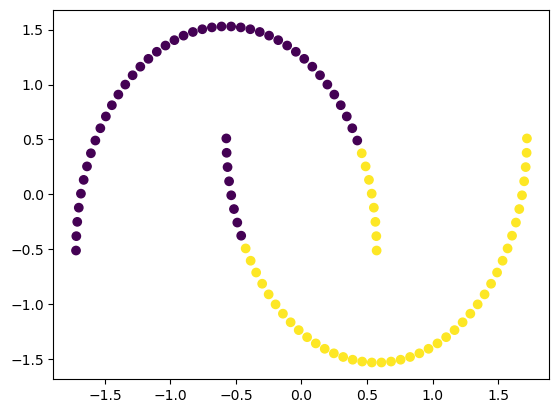

In [40]:
plt.scatter(scaled_moon[:,0], scaled_moon[:,1],c=moons_preds_kmeans)
plt.show()

The plot clearly shows data points wrongly classified in different clusters. To avoid this, the `DBSCAN` clustering algorithm is used, which works with data that are not linearly separable.

In [86]:
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=100, shuffle=True, random_state=42)
dbscan = DBSCAN(eps=0.13,  # eps hyperparameter The maximum distance between two samples for one to be considered as in the neighborhood of the other
             min_samples=5) # min_samples defines the min no. of points required to form a dense region. defaults to 5

dbscan.fit(X)
preds_dbscan = dbscan.fit_predict(X)

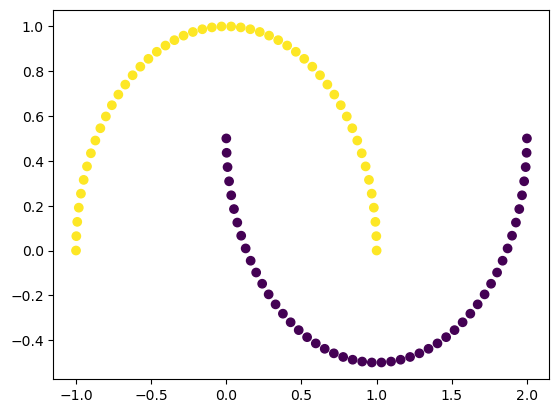

In [87]:
plt.scatter(X[:,0], X[:,1],c=preds_dbscan)
plt.show()

To select the optimal value for `eps`, One approach would be to find the nearest neighbors and analyze the distance between the points. Once the distance graph is drawn, one can look for the significant change in the slope of the distance graph. This will represent the choice for `eps`. 

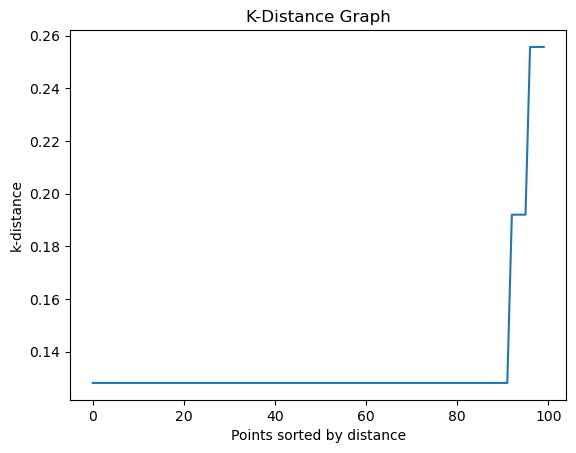

In [88]:
from sklearn.neighbors import NearestNeighbors

k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort distances to the k-th nearest neighbor
k_distances = np.sort(distances[:, k-1])

# Plot the k-distance graph
plt.plot(k_distances)
plt.ylabel('k-distance')
plt.xlabel('Points sorted by distance')
plt.title('K-Distance Graph')
plt.show()